<a href="https://colab.research.google.com/github/ssave41/ML/blob/master/ML_02_J041_13072020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exercise 1


### 1.Import dataset store it as dataframe in python: filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [ ]:
df = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [ ]:
auto = pd.read_csv(df)

In [ ]:
type(auto)

pandas.core.frame.DataFrame

### 2.Add column header to dataset


In [ ]:
col_names = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
auto = pd.read_csv(df, names=col_names)

### 3.Read the first 5 lines and display

In [ ]:
auto.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 4.Are there missing data? Or illegal characters in the dataframe?

Yes, we can see Na values and illegal characters like Question mark (?) in the data set.


### 5.Replace the character “?” with nan

In [ ]:
auto.replace("?", np.nan, inplace=True)
auto.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


### 6.Count missing values in each column and print it with column name

In [ ]:
def missing_values_table(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
  return mis_val_table_ren_columns

In [ ]:
missing_values_table(auto)

Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
normalized-losses,41,20.0
bore,4,2.0
stroke,4,2.0
price,4,2.0
num-of-doors,2,1.0
horsepower,2,1.0
peak-rpm,2,1.0


### 7.Delete price rows that have missing data

In [ ]:
auto.drop(auto[auto.price.isnull()].index, axis=0, inplace=True)

### 8.Normalized losses,bore,stroke,horsepower,peak-rpm, - replace missing with mean of the column

In [ ]:
auto['normalized-losses'].replace(np.nan,(auto['normalized-losses'].astype('float').mean(axis=0)),inplace = True)

In [ ]:
auto['bore'].replace(np.nan,(auto['bore'].astype('float').mean(axis=0)),inplace = True)

In [ ]:
auto['stroke'].replace(np.nan,(auto['stroke'].astype('float').mean(axis=0)),inplace = True)

In [ ]:
auto['horsepower'].replace(np.nan,(auto['horsepower'].astype('float').mean(axis=0)),inplace = True)

In [ ]:
auto['peak-rpm'].replace(np.nan,(auto['peak-rpm'].astype('float').mean(axis=0)),inplace = True)

### 9.Num-of-doors replace missing with most frequent value in the column

In [ ]:
auto['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [ ]:
auto['num-of-doors'].replace(np.nan,'four',inplace = True)

### 10.Reset the index of dataframe

In [ ]:
auto.reset_index(inplace = True)

### 11.Check datatype of columns and convert numeric/quantitative variables to float or int

In [ ]:
auto.dtypes

index                  int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
for i in auto._get_numeric_data().columns:
    auto[i] = auto[i].astype('float')

In [ ]:
auto.dtypes

index                float64
symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object

### 12.Transform city-mpg and highway-mpg into liters/100km using conversion formula:
L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”


In [ ]:
auto['city-L/100km'] = 235/auto['city-mpg']
auto['highway-L/100km'] = 235/auto['highway-mpg']

### 13. Normalize columns length, width, height so that their values range from 0 to 1.         
Hint:  Replace original values with original_value/max_value

In [ ]:
auto['length'] = auto['length']/auto['length'].max()
auto['width'] = auto['width']/auto['width'].max()
auto['height'] = auto['height']/auto['height'].max()

### 14.Plot the histogram of horsepower to see its distribution

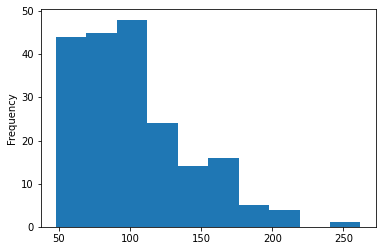

In [ ]:
auto['horsepower'] = auto['horsepower'].astype('int')
auto.horsepower.plot(kind = 'hist')

### 15.Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

In [ ]:
bins = np.linspace(min(auto["horsepower"]), max(auto["horsepower"]), 4)

In [ ]:
b_name = ['low', 'medium', 'high']

In [ ]:
auto['horsepower-binned'] = pd.cut(auto['horsepower'], bins, labels=b_name, include_lowest=True )
auto['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

### 16.Plot distribution of “horsepower-binned”

(array([153.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

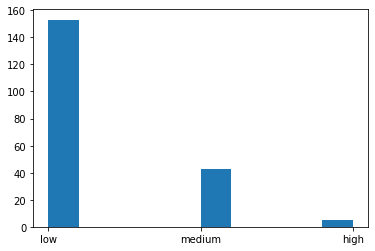

In [ ]:
plt.hist(auto['horsepower-binned'])

### 17.Convert “fuel-type” into one-hot-encoded variables. Repeat same for “aspiration” and then drop columns “fuel-type” and “aspiration”

In [ ]:
FT_OHE = pd.get_dummies(auto['fuel-type'])
auto = auto.join(FT_OHE)
auto.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
ASP_OHE = pd.get_dummies(auto['aspiration'])
auto = auto.join(ASP_OHE)
auto.drop("aspiration", axis = 1, inplace=True)

## Exercise 2

### 1.Import the dataset: path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [ ]:
df = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

### 2.Import matplotlib, seaborn, numpy and pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.See dimensions of data frame and its data types for each column


In [ ]:
automobile = pd.read_csv(df)

In [ ]:
automobile.shape

(201, 29)

In [ ]:
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

The dimensions of the dataset are (201,29) and data types for each column are given above.

### 4.Calculate correlation between engine-size and price using corr function


In [ ]:
ep = automobile.corr()
ep['engine-size']['price']

0.8723351674455199

### 5.Identify variables with positive or negative correlation with price


In [ ]:
correlation = automobile.corr()
for i in automobile.describe().columns:
    temp = correlation['price'][i]
    if (temp > 0):
       print(i)

normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
price
city-L/100km
diesel


In [ ]:
correlation = automobile.corr()
for i in automobile.describe().columns:
    temp = correlation['price'][i]
    if (temp < 0):
       print(i)

symboling
peak-rpm
city-mpg
highway-mpg
gas


Variables with positive correlation:normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower,city-L/100km, diesel

Variables with negative correlation: symboling, peak-rpm, city-mppg, highway-mpg, gas



### 6.Identify datatype of “peak-rpm”


In [ ]:
type(automobile['peak-rpm'][1])

numpy.float64

### 7.Using seaborn regplot() - plot relation between “engine-size” and “price”.


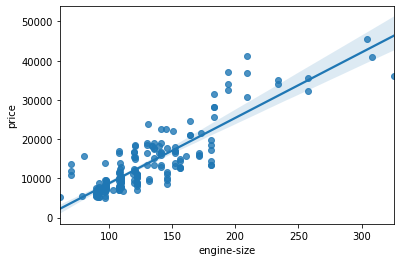

In [ ]:
sns.regplot(x="engine-size", y="price", data=automobile)

### 8.Use regplot() - on other variables with “price” 

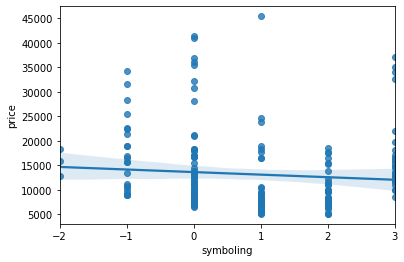

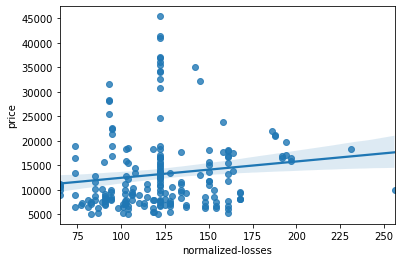

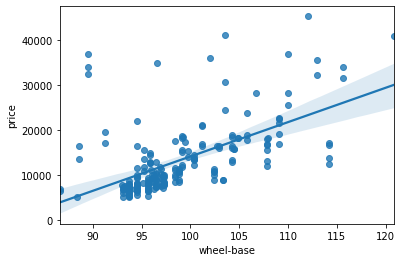

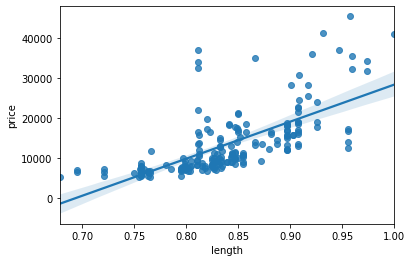

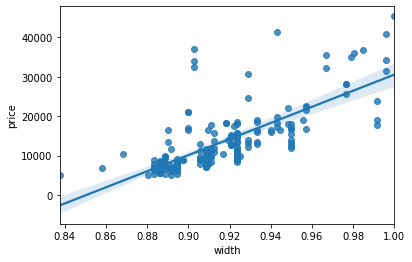

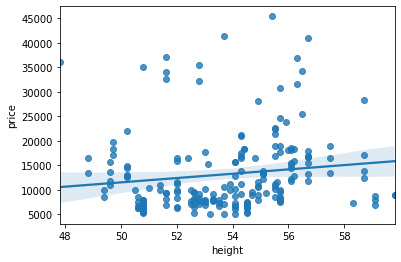

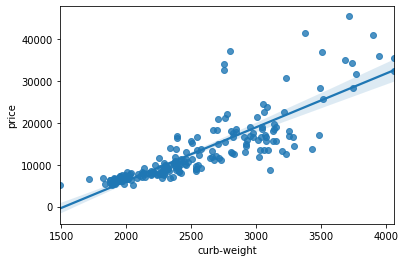

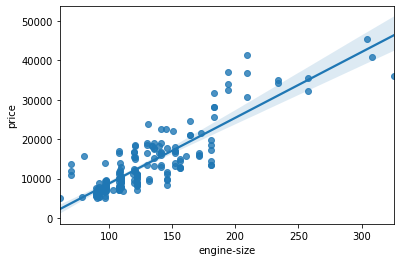

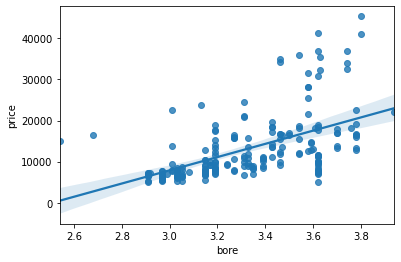

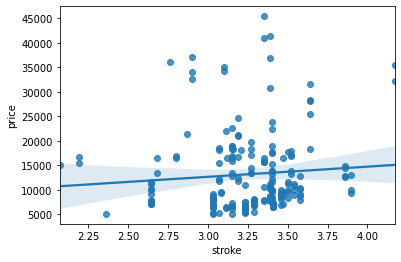

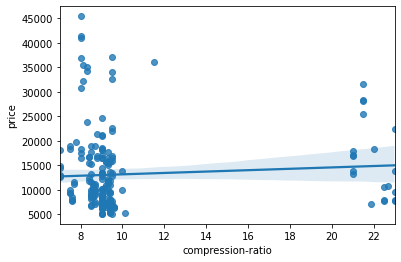

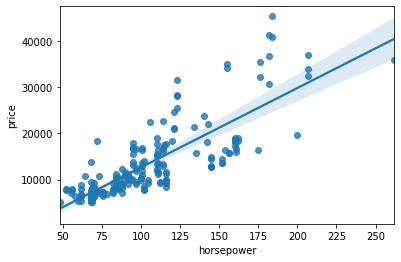

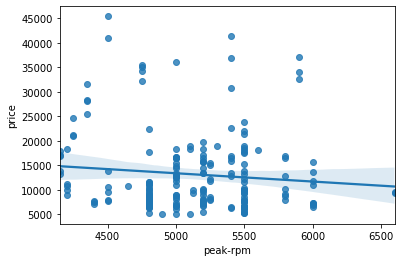

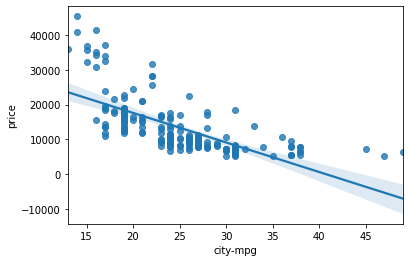

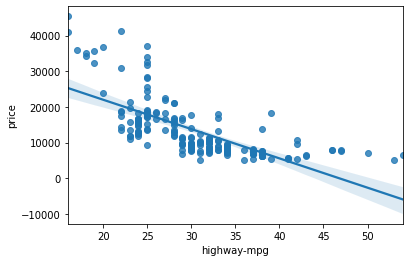

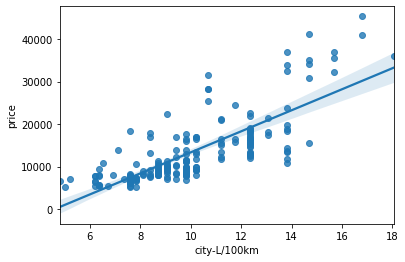

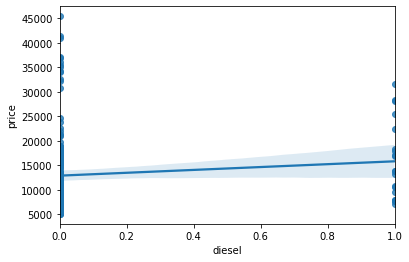

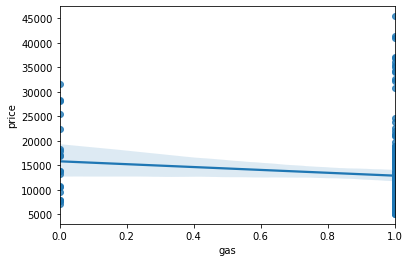

In [ ]:
for i in automobile.describe().columns:
    if i!='price':
        sns.regplot(y='price', x=i, data = automobile)
        plt.show()

### 9.Use seaborn pairplot() to identify which variables can affect “price”


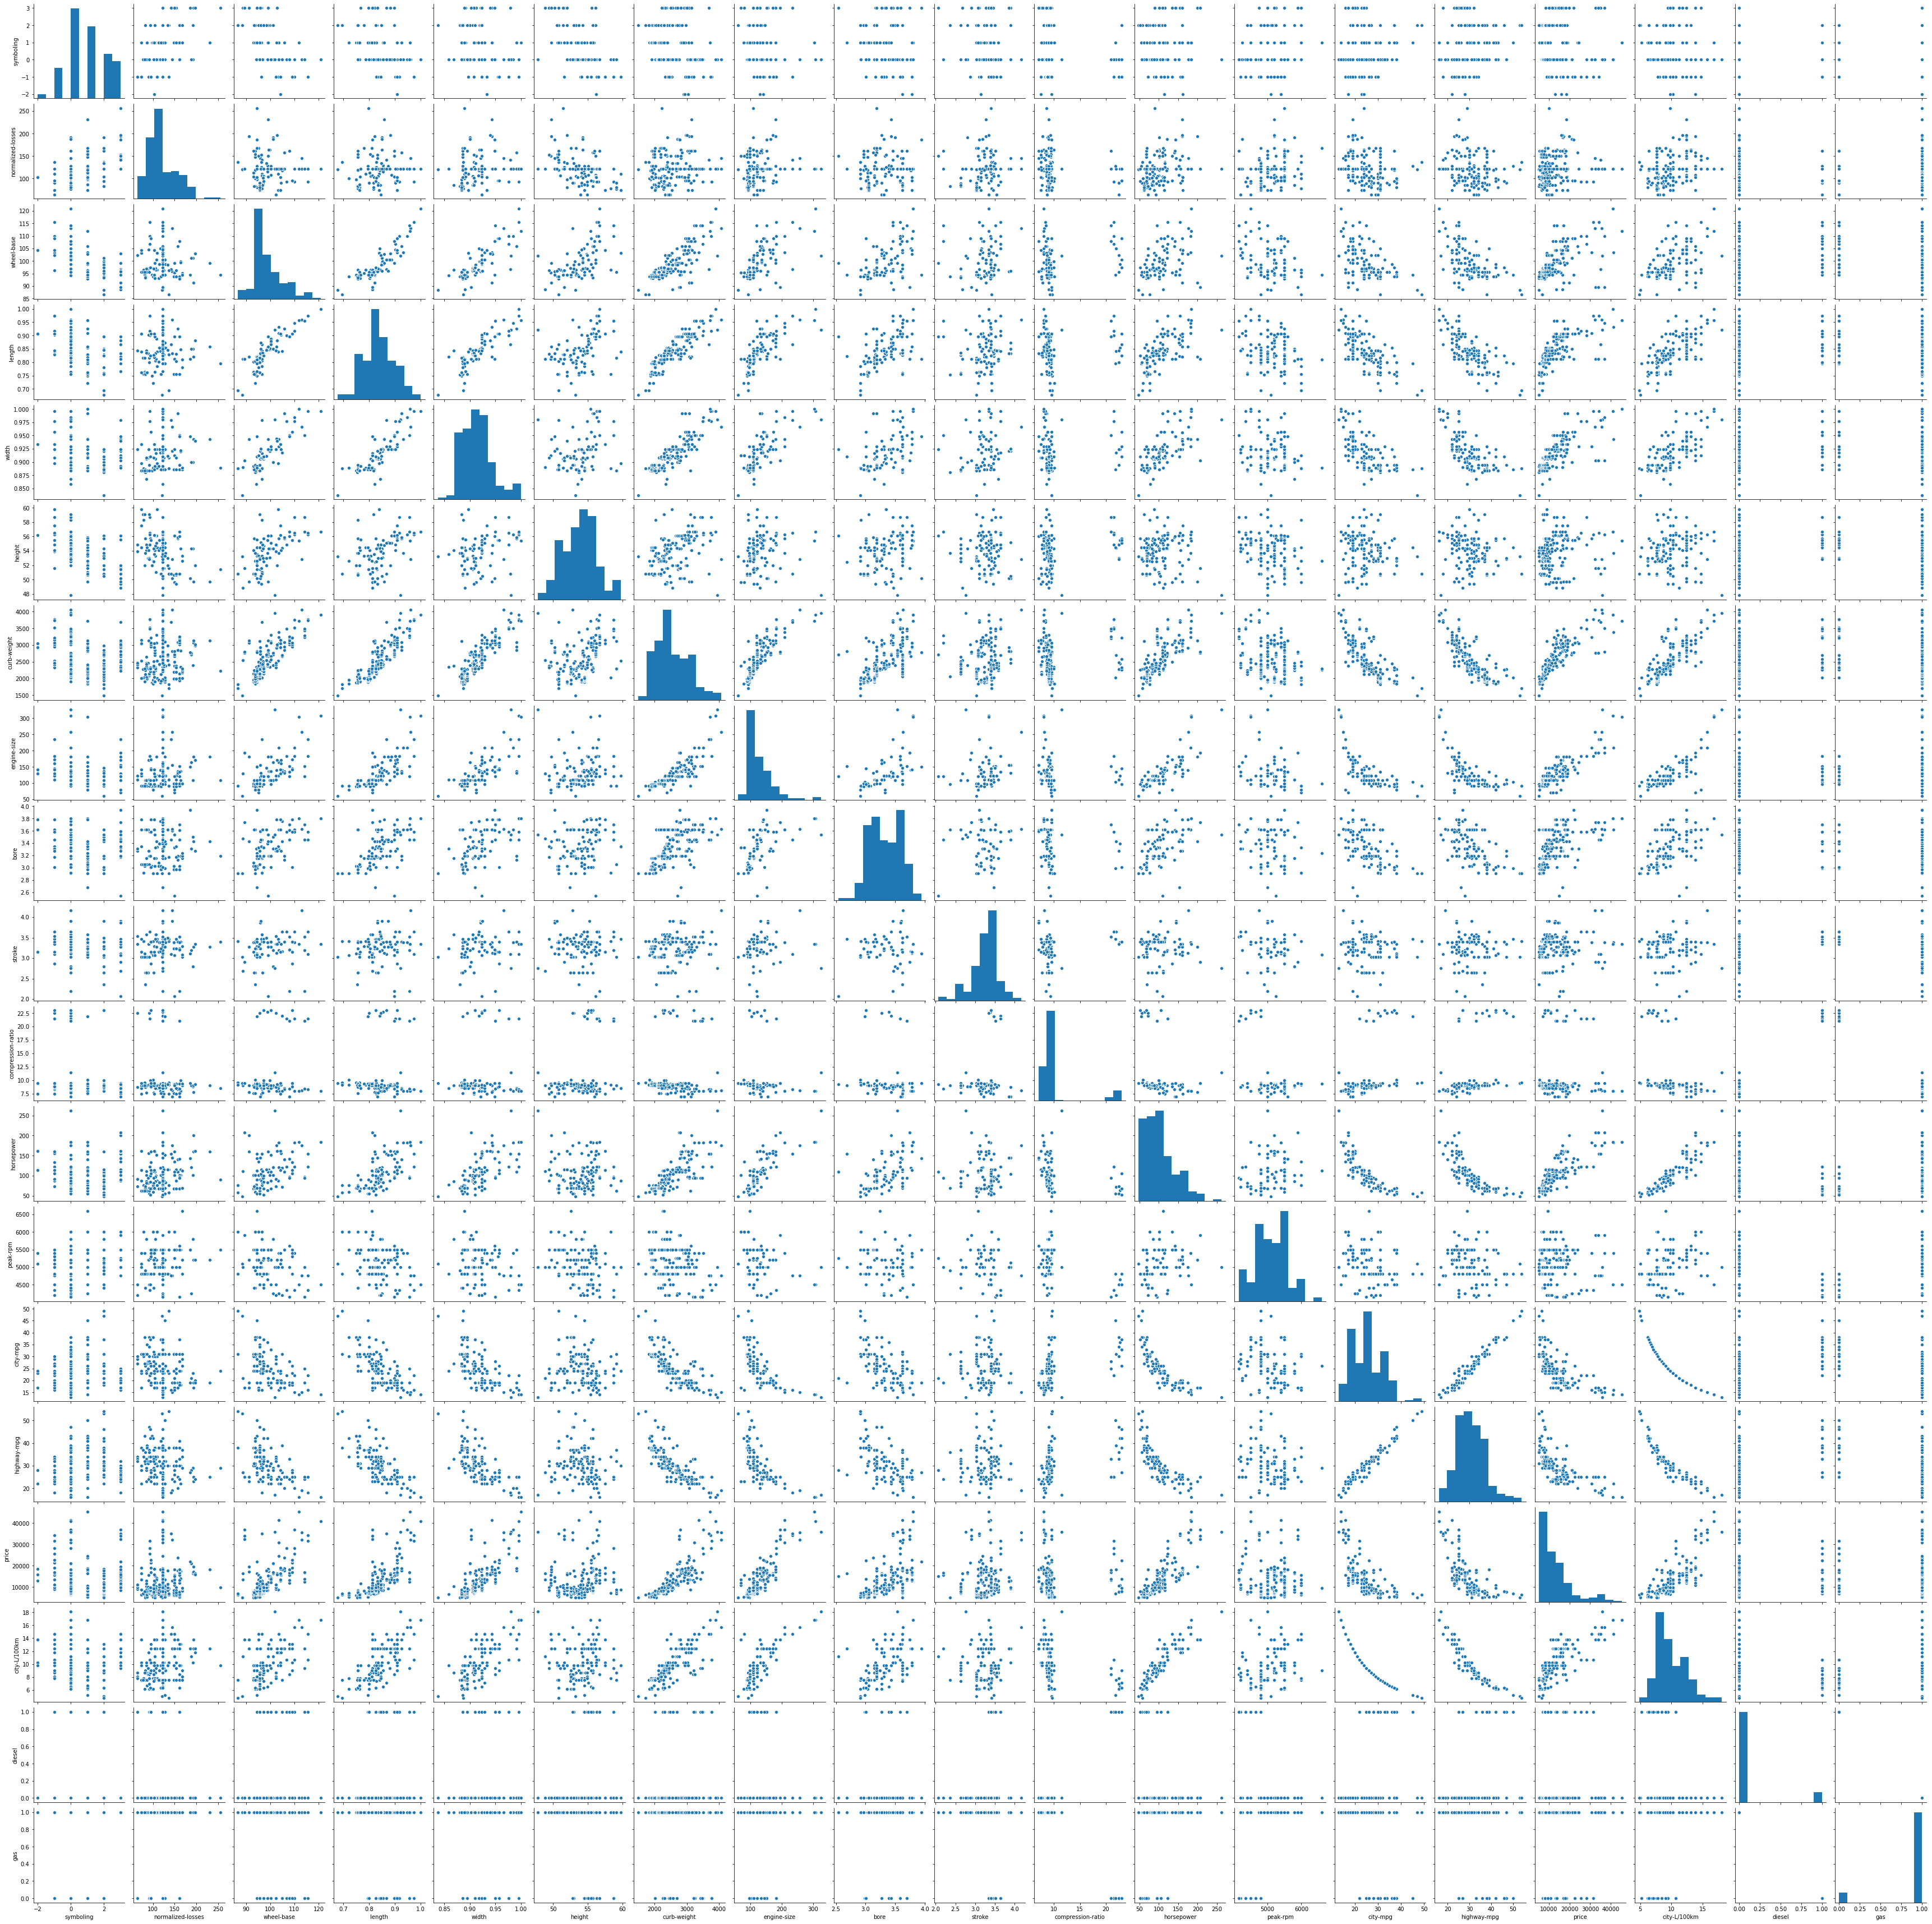

In [ ]:
sns.pairplot(automobile)
plt.show()

### 10.Draw a heatmap to plot the correlation in the dataframe


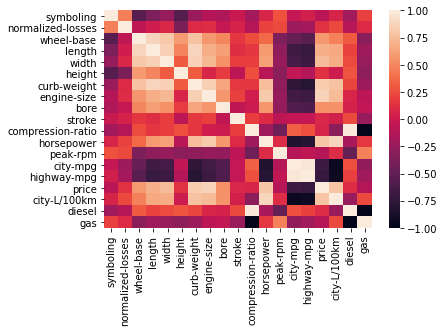

In [ ]:
hm = automobile.corr()
sns.heatmap(hm)
plt.show()

### 11.With seaborn boxplot() - compare “body-style” with “price” 


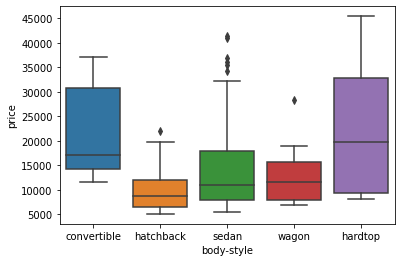

In [ ]:
sns.boxplot(x="body-style", y="price", data=automobile)

### 12.Continue for other categorical variables in the dataset.


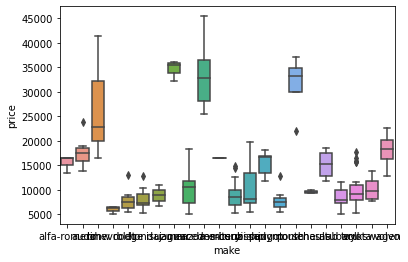

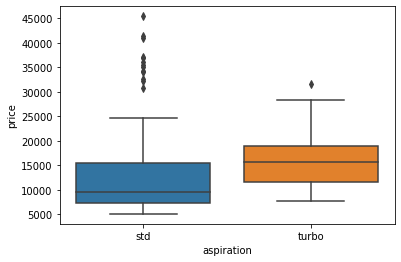

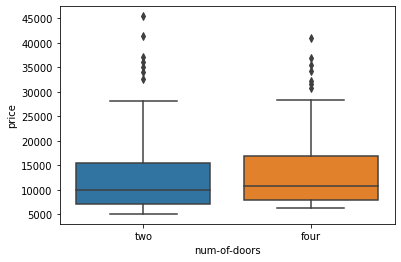

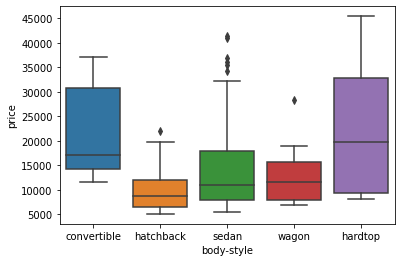

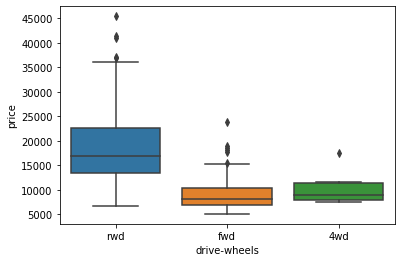

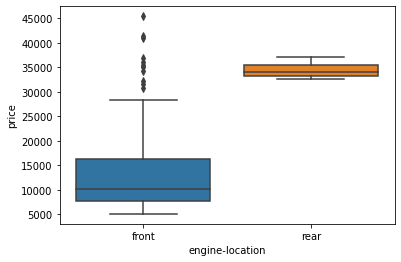

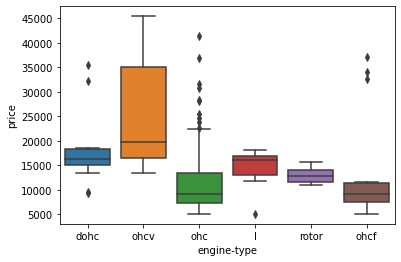

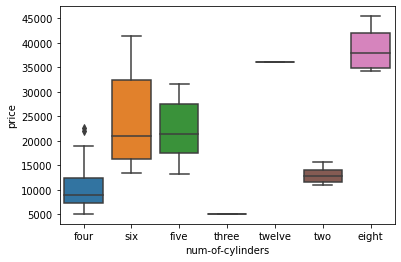

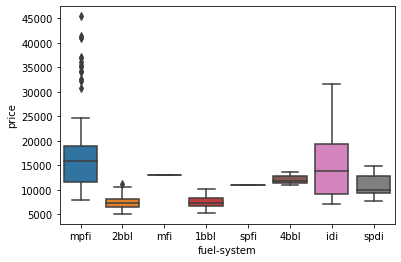

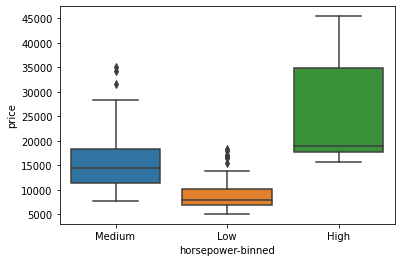

In [ ]:
for i in automobile.describe(include = np.object).columns:
    sns.boxplot(x=automobile[i], y=automobile.price)
    plt.show()

### 13.What do you infer from the boxplots about the relationship between the variables.




*   body-style - More or less the price range for every body type car is well 
defined with rarely any outliers, with the excpetion of sedan. There are a lot of sport sedans which cost more than the average sedan and cost more and hence are outliers in the data.
*   drive-wheelse - Majority of the cars have rear wheel drive and have very few outliers. Cars with front wheel or all wheel drive are fairly less and have a very short and well defined range for their price.
*    engine-locatione - Again, the majority of the cars have enging in the front and the and have a well defined price range. The cars with rear engines and the outliers of cars with front engines are majorly sports cars and that is why they are priced higher overall.
*    horsepower-binned - We can see that as the horsepower of a car increases, the price of the car also increases and the range to define the price of a car with low, medium or high horsepower gets broaded and broader.






### 14.Use describe() to get descriptive statistics of numeric variables


In [ ]:
automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


### 15.Use describe() to get stats of categorical variables


In [ ]:
automobile.describe(include=np.object)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### 16.Get unique values in each categorical variable along with their frequency. What do you understand by doing this?


In [ ]:
for i in automobile.describe(include=np.object).columns:
    print(i)
    print(automobile[i].value_counts())

make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
aspiration
std      165
turbo     36
Name: aspiration, dtype: int64
num-of-doors
four    115
two      86
Name: num-of-doors, dtype: int64
body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
engine-location
front    198
rear       3
Name: engine-location, dtype: int64
engine-type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-


After observing certain groups we can say that certain segments are most sold.
For eg. majority of the cars have standard aspiration, prefer 4 door cars over 2 doors, sedan and hatchback are the most sought after models. We can also see that people like their car engines in the front, and engine type of ohc with majority having 6 cylinders.

### 17.Use groupby() to get the average price of “drive-wheels” wrt “price”. 


In [ ]:
dwp = automobile[['drive-wheels','price']]
groupdwp = dwp.groupby(['drive-wheels'],as_index=False).mean()
groupdwp

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


### 18.Repeat step 17 for other categorical variables. What do you understand by doing this?


In [ ]:
for i in automobile.describe(include=np.object).columns:
    print(automobile.groupby(i)['price'].mean())
    print('----')

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
----
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
----
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
----
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wag

We can see that the average price of cars with rear wheel drive is more than that of other cars. We can infer two major things from this:-
As we had seen earlier that a large proportion of the cars (38-39%) had rear wheel drive and the prices of these cars ranged from very low to very high, that is why we could be seeing a high average for cars with rear wheel drive.
We also see that the 4 wheel drive cars have a relatively high average even though there are very very few cars of that type (3-4%). We obtain this avergae because all the cars are relatively evenly priced and thus there is a lot less range in the price of the cars with 4 wheel drive which can affect the average price.

### 19.Use groupby() to find the average price for “drive-wheels”and”body-style” with price. Observation? Inference?


In [ ]:
temp = automobile.groupby(['drive-wheels','body-style'])['price'].mean()
temp

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

- We can see that there are no convertibles or hardtops in the 4 wheel drive and the avergae price of sedan cars is the most in a 4 wheel drive system.
- We can see that convertibles have a higher overall price average in forward wheel drive, while hatchback and hardtop and sedan and wagon are relatively close in their average pricing.
- We can see that rear wheel drive convertibles are the most expensive closely followed by the hardtop cars

### 20.Use pivot() on the result of step 19 to get “drive-wheels” as index and “body-style” as columns.


In [ ]:
temp = automobile[['drive-wheels','body-style','price']]
for_pivot = temp.groupby(['drive-wheels','body-style'], as_index=False).mean()
piv1 = for_pivot.pivot(index = 'drive-wheels', columns = 'body-style')
piv1

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

### 21.Repeat step 19and20 for other combinations of independent variables wrt price. Observations? Inferences?


In [ ]:
cols = automobile.describe(include=np.object).columns
redundant = []
for i in cols:
    redundant.append(i)
    for j in cols:
        if i==j or j in redundant:
            continue
        else:
            #print(i,' and ',' with respect to price')
            temp = automobile.groupby([i,j])['price'].mean()
            print(temp, end='\n\n')
            temp = automobile[[i,j,'price']]
            for_pivot = temp.groupby([i,j], as_index=False).mean()
            piv = for_pivot.pivot(index = i, columns = j)
            piv.replace(np.nan, '-', inplace= True)
            print('Pivot Table')
            print(piv)
            print('------', end='\n\n')

make           aspiration
alfa-romero    std           15498.333333
audi           std           16656.000000
               turbo         23875.000000
bmw            std           26118.750000
chevrolet      std            6007.000000
dodge          std            6900.000000
               turbo          9826.333333
honda          std            8184.692308
isuzu          std            8916.500000
jaguar         std           34600.000000
mazda          std           10652.882353
mercedes-benz  std           38900.000000
               turbo         28394.000000
mercury        turbo         16503.000000
mitsubishi     std            7314.714286
               turbo         11485.666667
nissan         std            9869.588235
               turbo         19699.000000
peugot         std           14649.000000
               turbo         16189.166667
plymouth       std            7004.600000
               turbo         10360.500000
porsche        std           31400.500000
renault 

We can see that there are no cars with medium or low horsepower which have their engine in rear. These are majorly the sports cars of segment. We also see that of all the segments, the cars having engine in the front and with low horsepower have the lowest average price of any car.

### 22.Draw heatmap for result of step20


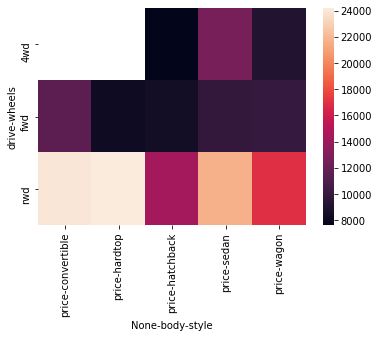

In [ ]:
sns.heatmap(piv1)

### 23.Calculate the pearson correlation between “wheel-base” and “price”. What can you conclude from p-value (Hint: use stats from scipy which has pearsonr())


In [ ]:
from scipy.stats import pearsonr
pear, p_val = pearsonr(automobile['wheel-base'], automobile['price'])
print(pear, p_val)

0.584641822265508 8.076488270733218e-20


A small f value means there is no correlation between the variables and the p value is near to 0 so there is a statistical significance

### 24.Perform one way ANOVA test using f_oneway() of stats to check if different groups of “drive-wheels” are correlated with “price”. What do you understand from F-test and p-value results?


In [ ]:
from scipy import stats
temp1 = automobile[['drive-wheels', 'body-style','price']]
temp = automobile[['drive-wheels', 'price']].groupby(['drive-wheels'])
temp
f_val, p_val = stats.f_oneway(temp.get_group('fwd')['price'], 
                              temp.get_group('4wd')['price'], 
                              temp.get_group('rwd')['price'])
print(f_val, p_val)

67.95406500780398 3.3945443577151245e-23


A large f value signifies a greater correlation and a p value near to 0 signfies that there is a statistical significance.